In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import and enviromental setups
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Custom utils functions
from utils.dataset import load
from utils.preprocess import find_duplicates, visualize_duplicates
from utils.plotting import create_countplot, create_k_samples

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Define Variables
rawDataPath = "../Data/Furniture_Data/"

In [6]:
# Load DataFrame
furniture_dataset = load(rawDataPath)

Error processing ../Data/Furniture_Data/lamps\Modern\11286modern-lighting.jpg: [Errno 13] Permission denied: '../Data/Furniture_Data/lamps\\Modern\\11286modern-lighting.jpg'


In [5]:
furniture_dataset.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [6]:
furniture_dataset.head()

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian


In [7]:
furniture_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90083 entries, 0 to 90082
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ImgPath         90083 non-null  object 
 1   FileType        90083 non-null  object 
 2   Width           90083 non-null  int64  
 3   Height          90083 non-null  int64  
 4   Ratio           90083 non-null  float64
 5   Mode            90083 non-null  object 
 6   Bands           90083 non-null  object 
 7   Transparency    90083 non-null  bool   
 8   Animated        90083 non-null  bool   
 9   Category        90083 non-null  object 
 10  Interior_Style  90083 non-null  object 
dtypes: bool(2), float64(1), int64(2), object(6)
memory usage: 6.4+ MB


In [7]:
print("Total number of products : ", furniture_dataset.shape[0])
print("Total number of unique categories : ", furniture_dataset["Category"].nunique())
print("Total number of unique styles : ", furniture_dataset["Interior_Style"].nunique())

Total number of products :  90083
Total number of unique categories :  6
Total number of unique styles :  17


In [8]:
furniture_dataset.sample(n = 20, random_state=43) 

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
9441,chairs/Contemporary/2923contemporary-dining-ch...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Contemporary
84542,tables/Modern/11560modern-coffee-and-accent-ta...,jpg,350,350,1.0,RGB,R G B,False,False,tables,Modern
47153,lamps/Craftsman/26694craftsman-table-lamps.jpg,jpg,350,350,1.0,RGB,R G B,False,False,lamps,Craftsman
15179,chairs/Midcentury/18848midcentury-dining-chair...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Midcentury
32396,dressers/Rustic/5734rustic-dressers.jpg,jpg,350,350,1.0,RGB,R G B,False,False,dressers,Rustic
343,beds/Contemporary/1269contemporary-bunk-beds.jpg,jpg,224,224,1.0,RGB,R G B,False,False,beds,Contemporary
24144,chairs/Transitional/21704transitional-dining-c...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Transitional
84941,tables/Modern/27.jpg,jpg,350,350,1.0,RGB,R G B,False,False,tables,Modern
15499,chairs/Midcentury/19204midcentury-armchairs-an...,jpg,350,350,1.0,RGB,R G B,False,False,chairs,Midcentury
29792,dressers/Contemporary/309contemporary-dressers...,jpg,350,350,1.0,RGB,R G B,False,False,dressers,Contemporary


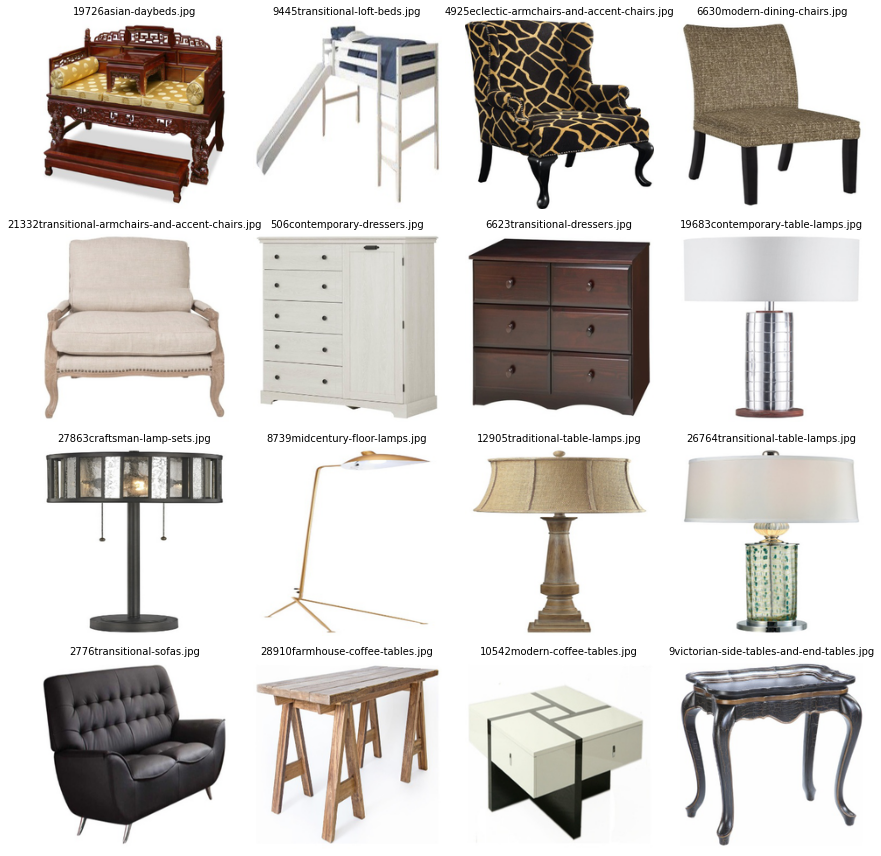

In [9]:
create_k_samples(rawDataPath, furniture_dataset, k=16)

In [10]:
duplicates_df = find_duplicates(furniture_dataset, rawDataPath)

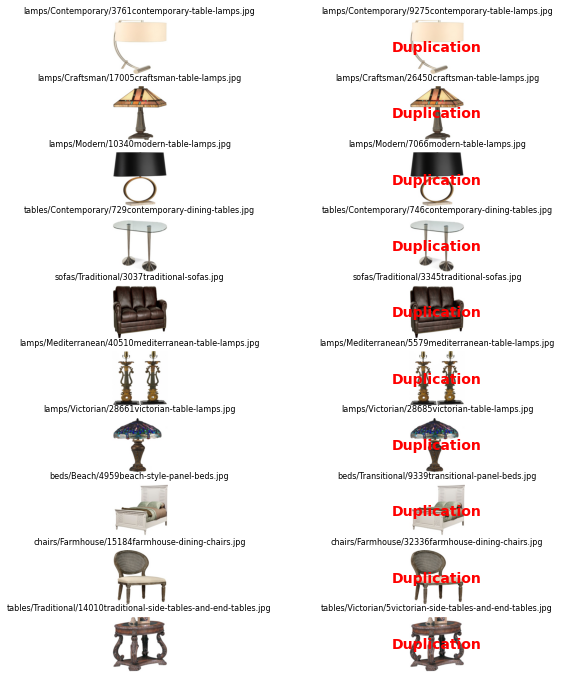

In [11]:
visualize_duplicates(duplicates_df, 10)


In [12]:
# Length of the duplicates dataframe
print(len(duplicates_df), "duplicated images")

19393 duplicated images


As we can see from the visualization above, there are almost 20,000 duplicated images in our dataset which could contribute to the noise in the dataset, not ideal for training our model.

In [13]:

furniture_dataset.head()

,ImgPath,FileType,Width,Height,Ratio,Mode,Bands,Transparency,Animated,Category,Interior_Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,R G B,False,False,beds,Asian


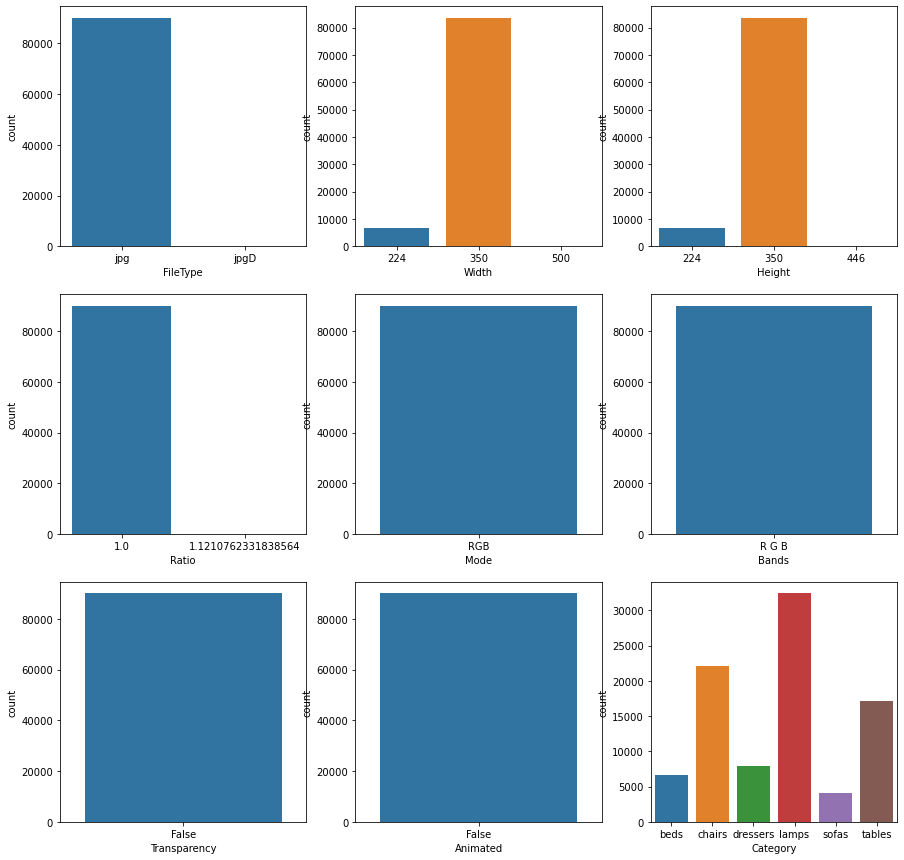

In [14]:
# plotting the countplot of the furniture dataset

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

# Create countplots for each column in the dataset
create_countplot(furniture_dataset, 'FileType', ax[0, 0])
create_countplot(furniture_dataset, 'Width', ax[0, 1])
create_countplot(furniture_dataset, 'Height', ax[0, 2])
create_countplot(furniture_dataset, 'Ratio', ax[1, 0])
create_countplot(furniture_dataset, 'Mode', ax[1, 1])
create_countplot(furniture_dataset, 'Bands', ax[1, 2])
create_countplot(furniture_dataset, 'Transparency', ax[2, 0])
create_countplot(furniture_dataset, 'Animated', ax[2, 1])
create_countplot(furniture_dataset, 'Category', ax[2, 2])


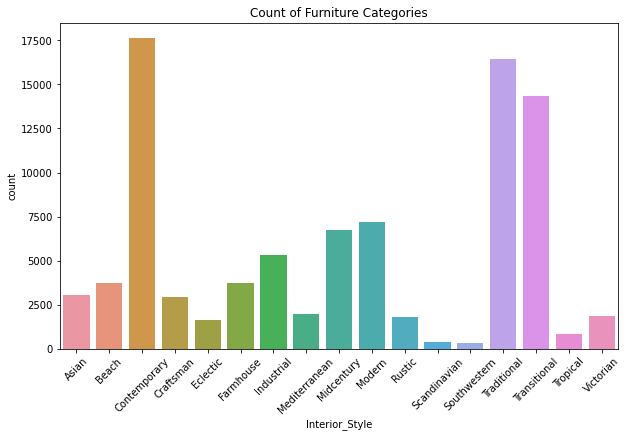

In [15]:
# Countplot of interior styles
plt.figure(figsize=(10, 6))
sns.countplot(data=furniture_dataset, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Furniture Categories')
plt.show()


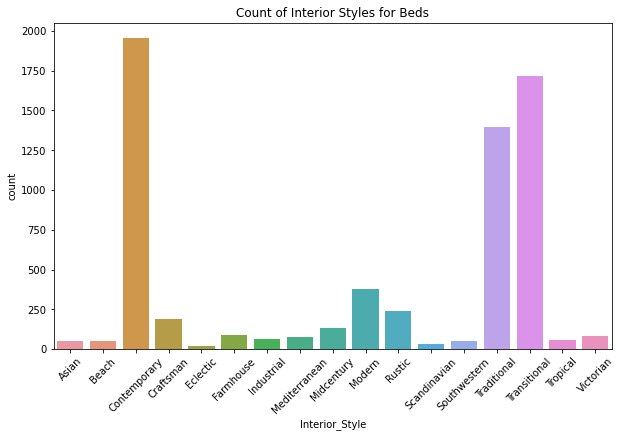

In [16]:
# EDA For each Category

# Beds

beds_df = furniture_dataset[furniture_dataset['Category'] == 'beds']

# Plot the countplot of interior styles for beds
plt.figure(figsize=(10, 6))
sns.countplot(data=beds_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Beds')
plt.show()


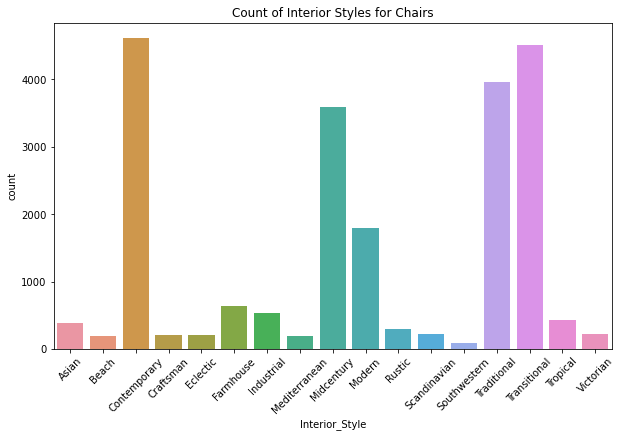

In [17]:
# Chairs

chairs_df = furniture_dataset[furniture_dataset['Category'] == 'chairs']

# Plot the countplot of interior styles for chairs
plt.figure(figsize=(10, 6))
sns.countplot(data=chairs_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Chairs')
plt.show()

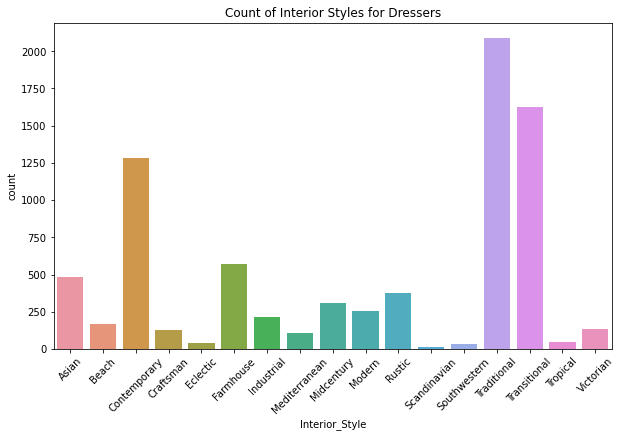

In [18]:
# Dressers

dressers_df = furniture_dataset[furniture_dataset['Category'] == 'dressers']

# Plot the countplot of interior styles for dressers
plt.figure(figsize=(10, 6))
sns.countplot(data=dressers_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Dressers')
plt.show()

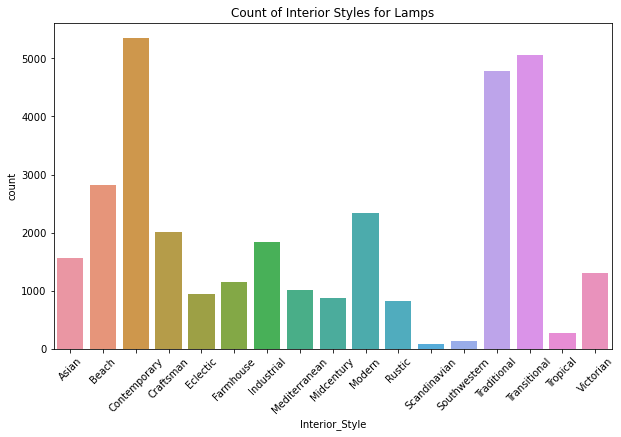

In [19]:
# Lamps

lamps_df = furniture_dataset[furniture_dataset['Category'] == 'lamps']

# Plot the countplot of interior styles for lamps
plt.figure(figsize=(10, 6))
sns.countplot(data=lamps_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Lamps')
plt.show()

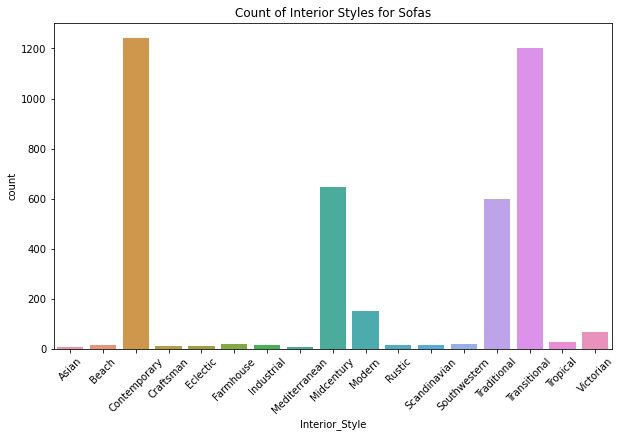

In [20]:
# Sofas

sofas_df = furniture_dataset[furniture_dataset['Category'] == 'sofas']

# Plot the countplot of interior styles for sofas
plt.figure(figsize=(10, 6))
sns.countplot(data=sofas_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Sofas')
plt.show()


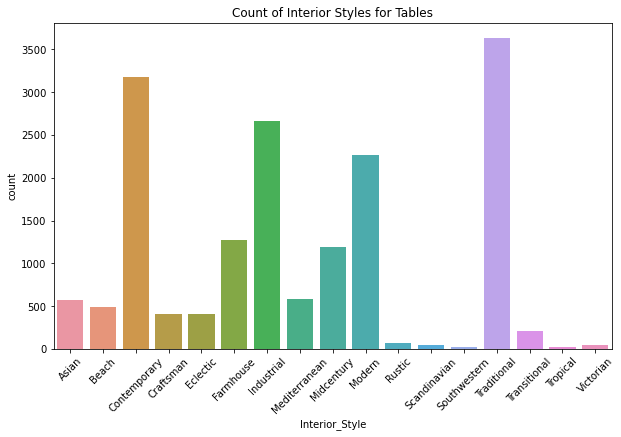

In [21]:
# Tables

tables_df = furniture_dataset[furniture_dataset['Category'] == 'tables']

# Plot the countplot of interior styles for tables
plt.figure(figsize=(10, 6))
sns.countplot(data=tables_df, x='Interior_Style')
plt.xticks(rotation=45)
plt.title('Count of Interior Styles for Tables')
plt.show()